In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('gender_classification.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
data.shape

(5001, 8)

#### since no null values are present, so can proceed further
#### We have one categorical column-->gender

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['gender'] = labelencoder.fit_transform(data['gender'])
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


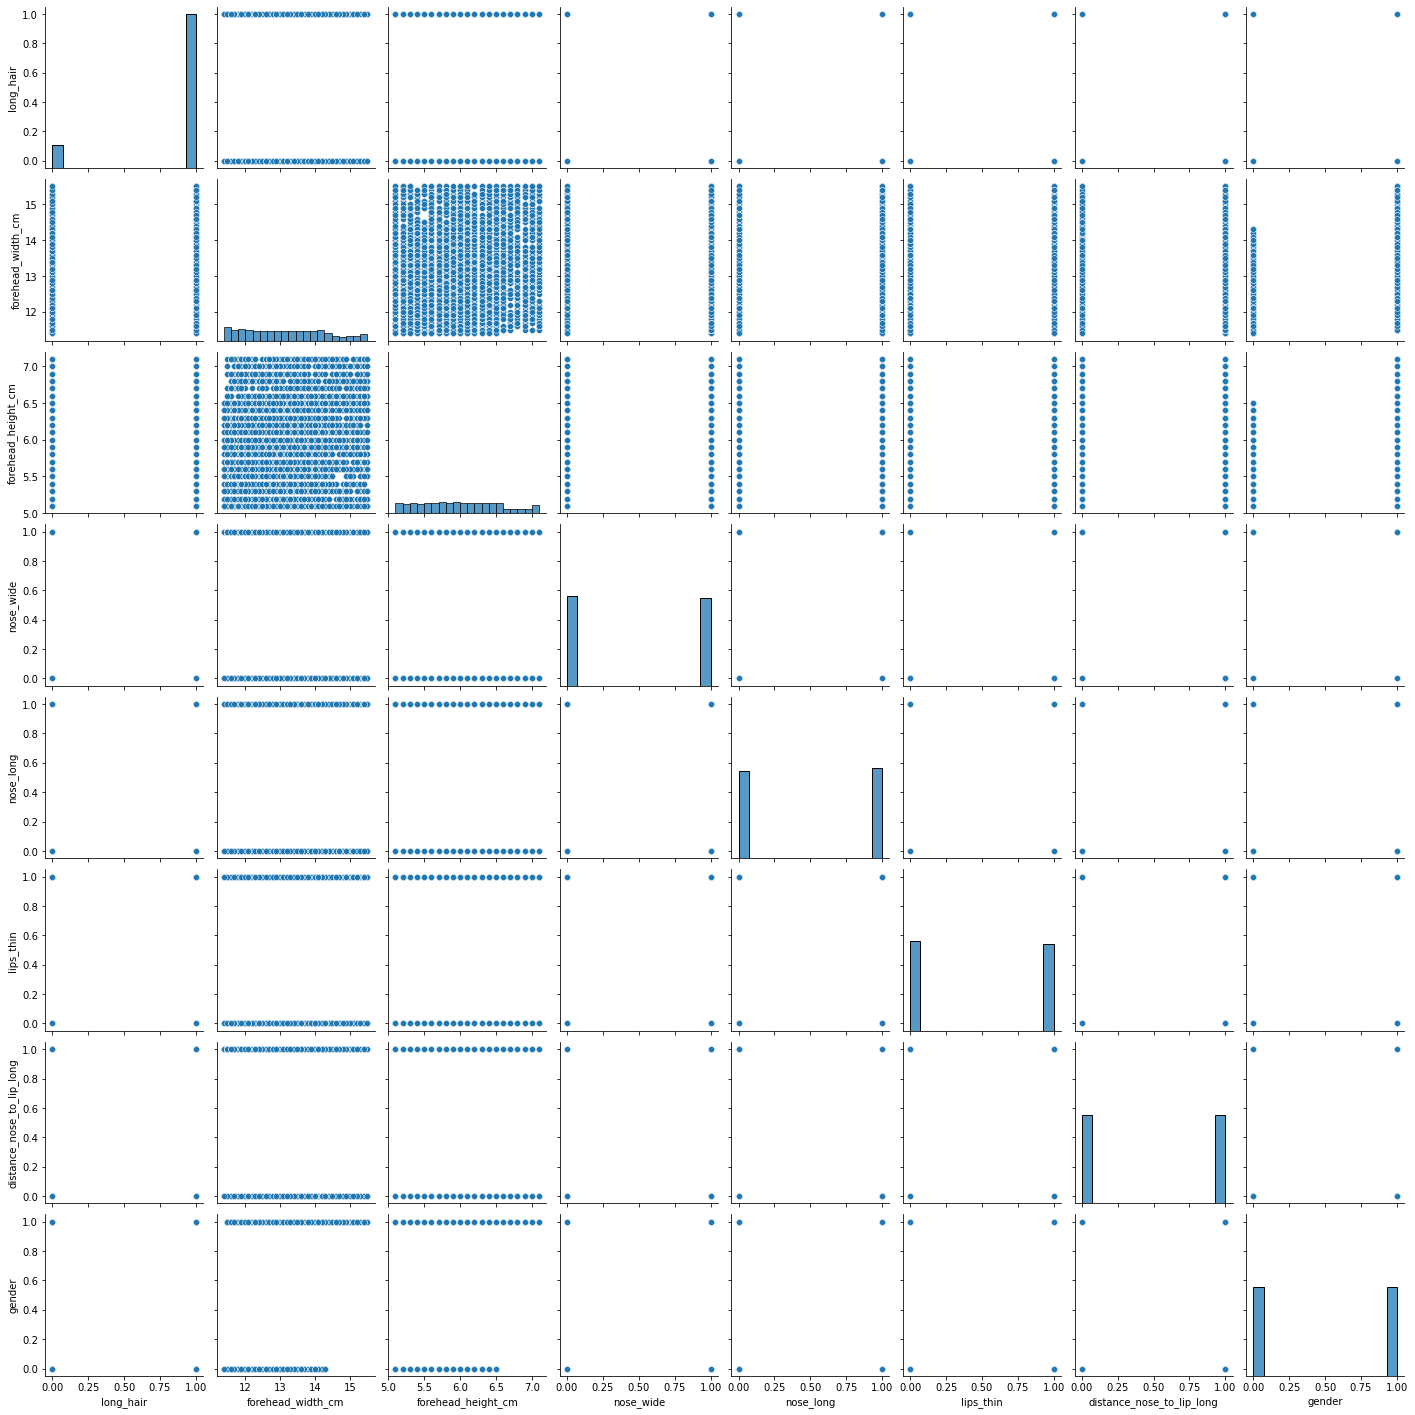

In [8]:
sns.pairplot(data)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

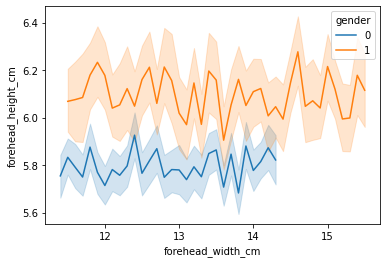

In [9]:
sns.lineplot(data['forehead_width_cm'],data['forehead_height_cm'], hue=data["gender"])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nose_long', ylabel='nose_wide'>

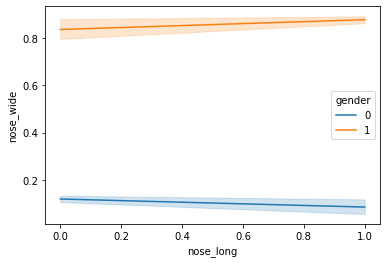

In [13]:
sns.lineplot(data['nose_long'],data['nose_wide'], hue=data["gender"])

## Train-Test Split

In [14]:
X=data.drop(['gender'],axis=1)
y=data['gender']
X.shape, y.shape

((5001, 7), (5001,))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [16]:
X_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2348,1,15.0,5.3,1,1,1,1
816,1,12.7,6.3,0,0,0,0
3867,1,13.2,6.3,1,1,1,1
245,1,11.5,5.6,0,0,1,0
3321,1,12.9,5.5,1,1,1,1
...,...,...,...,...,...,...,...
3046,1,14.2,6.0,1,0,0,1
1725,1,11.9,5.7,0,0,0,0
4079,1,11.5,6.0,1,0,1,0
2254,1,13.0,5.2,0,0,0,0


In [18]:
X_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
27,1,12.5,5.2,0,0,0,0
1482,1,14.7,6.2,1,1,1,1
3022,0,15.2,6.7,1,1,1,0
3110,1,11.5,5.6,1,1,1,1
637,0,15.3,5.3,1,0,0,1
...,...,...,...,...,...,...,...
1330,1,12.9,5.3,0,0,0,0
2559,1,13.3,6.2,0,0,0,0
3217,1,12.6,5.5,0,0,0,0
4602,0,11.8,6.6,1,1,1,0


In [19]:
y_test

27      0
1482    1
3022    1
3110    1
637     1
       ..
1330    0
2559    0
3217    0
4602    1
1282    1
Name: gender, Length: 1001, dtype: int32

In [20]:
y_train

2348    1
816     0
3867    1
245     0
3321    1
       ..
3046    0
1725    0
4079    0
2254    0
2915    1
Name: gender, Length: 4000, dtype: int32

## feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [22]:
print(X_train_sc)

[[ 0.39251508  1.62944718 -1.19069334 ...  0.99352099  1.01511421
   1.00752834]
 [ 0.39251508 -0.44616675  0.66007738 ... -1.00652126 -0.98511083
  -0.99252792]
 [ 0.39251508  0.00505367  0.66007738 ...  0.99352099  1.01511421
   1.00752834]
 ...
 [ 0.39251508 -1.52909576  0.10484616 ... -1.00652126  1.01511421
  -0.99252792]
 [ 0.39251508 -0.1754345  -1.37577041 ... -1.00652126 -0.98511083
  -0.99252792]
 [ 0.39251508 -1.16811942 -1.19069334 ... -1.00652126  1.01511421
   1.00752834]]


In [23]:
X_test_sc

array([[ 0.39251508, -0.62665492, -1.37577041, ..., -1.00652126,
        -0.98511083, -0.99252792],
       [ 0.39251508,  1.35871493,  0.4750003 , ...,  0.99352099,
         1.01511421,  1.00752834],
       [-2.5476728 ,  1.80993535,  1.40038566, ...,  0.99352099,
         1.01511421, -0.99252792],
       ...,
       [ 0.39251508, -0.53641083, -0.8205392 , ..., -1.00652126,
        -0.98511083, -0.99252792],
       [-2.5476728 , -1.25836351,  1.21530859, ...,  0.99352099,
         1.01511421, -0.99252792],
       [ 0.39251508,  1.62944718,  1.21530859, ...,  0.99352099,
         1.01511421,  1.00752834]])

## MAchine Learning Algorithm

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

In [25]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1001 points : 35


In [26]:
accuracy_score(y_test, y_pred)

0.965034965034965

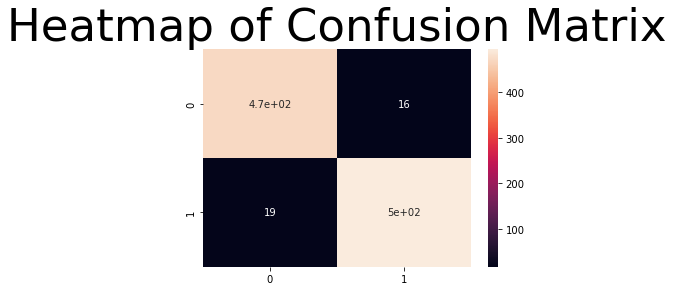

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 45)
sns.heatmap(cm, annot = True)
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       487
           1       0.97      0.96      0.97       514

    accuracy                           0.97      1001
   macro avg       0.96      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [31]:
recall_score(y_test, y_pred)

0.9630350194552529

In [32]:
precision_score(y_test, y_pred)

0.9686888454011742